In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dapprojekt24-1/train.csv
/kaggle/input/dapprojekt24-1/test.csv


In [3]:
df_train = pd.read_csv("../input/dapprojekt24-1/train.csv")
df_test = pd.read_csv("../input/dapprojekt24-1/test.csv")

DIMENSIONALITY OF DATASET


In [4]:
df_train.shape

(501400, 10)

In [5]:
df_test.shape

(209600, 9)

In the train dataset there are 501400 samples and 10 columns of data while in the test dataset there are 209600 samples and 9 columns of data. Columns and their names are shown in the table below:

In [6]:
df_train.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Target,Id
0,2010-01-04,MMM,53.295380,83.019997,83.449997,82.669998,83.089996,3043700.0,0,0
1,2010-01-05,MMM,52.961575,82.500000,83.230003,81.699997,82.800003,2847000.0,0,1
2,2010-01-06,MMM,53.712681,83.669998,84.599998,83.510002,83.879997,5268500.0,0,2
3,2010-01-07,MMM,53.751179,83.730003,83.760002,82.120003,83.320000,4470100.0,0,3
4,2010-01-08,MMM,54.129955,84.320000,84.320000,83.300003,83.690002,3405800.0,0,4


In [7]:
df_test.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Id
0,2020-01-02,MMM,149.672821,180.000000,180.009995,177.139999,177.679993,3601700.0,0
1,2020-01-03,MMM,148.383942,178.449997,178.660004,175.630005,177.020004,2466900.0,1
2,2020-01-06,MMM,148.525299,178.619995,178.710007,176.350006,177.149994,1998000.0,2
3,2020-01-07,MMM,147.926636,177.899994,178.509995,176.820007,178.279999,2173000.0,3
4,2020-01-08,MMM,150.196686,180.630005,181.500000,177.649994,178.000000,2758300.0,4


Column "Target" is dependent binary variable which equals 1 if stock should be bought on that date (if for a given stock there will be at least 2% increase in the next 2 months).

For now there are 6 features: Adj Close, Close, High, Low, Open and Volume. There are also columns Date and Symbol which will later be used to create new features.

In [8]:
print(len(df_train["Id"].unique()))

501400


This shows that column "Id" is irrelevant for our ML model so I will later remove it from the dataframe.

In [9]:
stocks_train = df_train["Symbol"].unique()
print(stocks_train)

['MMM' 'AOS' 'ACN' 'AES' 'A' 'AKAM' 'ALB' 'ALLE' 'LNT' 'GOOGL' 'MO' 'AMZN'
 'AXP' 'AWK' 'AME' 'ANSS' 'APA' 'AAPL' 'AMAT' 'ADM' 'ANET' 'AIZ' 'T' 'BKR'
 'BALL' 'BAC' 'BBY' 'BIIB' 'BLK' 'BMY' 'AVGO' 'BG' 'CPB' 'CAH' 'CBOE'
 'CHRW' 'CHTR' 'CMG' 'CINF' 'CSCO' 'CFG' 'CME' 'CMS' 'KO' 'CAG' 'ED' 'STZ'
 'CTVA' 'CTRA' 'CMI' 'DVA' 'DE' 'XRAY' 'FANG' 'DLR' 'DFS' 'DPZ' 'DHI'
 'DTE' 'DUK' 'EBAY' 'EMR' 'ENPH' 'EOG' 'EQIX' 'ESS' 'EL' 'EVRG' 'ES'
 'EXPD' 'EXR' 'FFIV' 'FAST' 'FIS' 'FE' 'FLT' 'FTV' 'FOXA' 'FCX' 'IT'
 'GEHC' 'GEN' 'GNRC' 'GM' 'GPC' 'GL' 'GS' 'HAS' 'PEAK' 'HSY' 'HES' 'HLT'
 'HST' 'HBAN' 'IBM' 'ILMN' 'PODD' 'INTC' 'IFF' 'IP' 'ISRG' 'IVZ' 'INVH'
 'IQV' 'JNJ' 'KVUE' 'KDP' 'KEY' 'KEYS' 'KMB' 'KIM' 'KMI' 'KR' 'LVS' 'LDOS'
 'LIN' 'LMT' 'LYB' 'MPC' 'MKTX' 'MMC' 'MCD' 'MAA' 'MHK' 'TAP' 'MPWR' 'MS'
 'MOS' 'MSI' 'NDAQ' 'NEE' 'NDSN' 'NOC' 'NRG' 'NVDA' 'NVR' 'ORCL' 'PKG'
 'PARA' 'PH' 'PAYX' 'PNR' 'PCG' 'PSX' 'PNW' 'PNC' 'PGR' 'PRU' 'PTC' 'PSA'
 'PHM' 'PWR' 'QCOM' 'DGX' 'RL' 'RF' 'RSG' 'RMD' 'RVTY' 'RH

In [10]:
stocks_test = df_test["Symbol"].unique()
print(stocks_test)

['MMM' 'AOS' 'ACN' 'AES' 'A' 'AKAM' 'ALB' 'ALLE' 'LNT' 'GOOGL' 'MO' 'AMZN'
 'AXP' 'AWK' 'AME' 'ANSS' 'APA' 'AAPL' 'AMAT' 'ADM' 'ANET' 'AIZ' 'T' 'BKR'
 'BALL' 'BAC' 'BBY' 'BIIB' 'BLK' 'BMY' 'AVGO' 'BG' 'CPB' 'CAH' 'CBOE'
 'CHRW' 'CHTR' 'CMG' 'CINF' 'CSCO' 'CFG' 'CME' 'CMS' 'KO' 'CAG' 'ED' 'STZ'
 'CTVA' 'CTRA' 'CMI' 'DVA' 'DE' 'XRAY' 'FANG' 'DLR' 'DFS' 'DPZ' 'DHI'
 'DTE' 'DUK' 'EBAY' 'EMR' 'ENPH' 'EOG' 'EQIX' 'ESS' 'EL' 'EVRG' 'ES'
 'EXPD' 'EXR' 'FFIV' 'FAST' 'FIS' 'FE' 'FLT' 'FTV' 'FOXA' 'FCX' 'IT'
 'GEHC' 'GEN' 'GNRC' 'GM' 'GPC' 'GL' 'GS' 'HAS' 'PEAK' 'HSY' 'HES' 'HLT'
 'HST' 'HBAN' 'IBM' 'ILMN' 'PODD' 'INTC' 'IFF' 'IP' 'ISRG' 'IVZ' 'INVH'
 'IQV' 'JNJ' 'KVUE' 'KDP' 'KEY' 'KEYS' 'KMB' 'KIM' 'KMI' 'KR' 'LVS' 'LDOS'
 'LIN' 'LMT' 'LYB' 'MPC' 'MKTX' 'MMC' 'MCD' 'MAA' 'MHK' 'TAP' 'MPWR' 'MS'
 'MOS' 'MSI' 'NDAQ' 'NEE' 'NDSN' 'NOC' 'NRG' 'NVDA' 'NVR' 'ORCL' 'PKG'
 'PARA' 'PH' 'PAYX' 'PNR' 'PCG' 'PSX' 'PNW' 'PNC' 'PGR' 'PRU' 'PTC' 'PSA'
 'PHM' 'PWR' 'QCOM' 'DGX' 'RL' 'RF' 'RSG' 'RMD' 'RVTY' 'RH

In [11]:
np.array_equal(stocks_train,stocks_test)

True

In [12]:
stocks = stocks_train.copy()

This shows that the stocks in the train and the test dataset are the same.


In [13]:
print(len(stocks))

200


There are 200 different stocks in the dataset.

MISSING VALUES

Missing data about stocks is usually caused by markets closing on holidays. 

In [14]:
dates_train = df_train["Date"].unique()
print(dates_train)

['2010-01-04' '2010-01-05' '2010-01-06' ... '2019-12-27' '2019-12-30'
 '2019-12-31']


In [15]:
print(len(dates_train))

2507


The test dataset contains data from the 4th of January, 2010 to the 31st of December, 2019 which totals 2507 days.

In [16]:
dates_test = df_test["Date"].unique()
print(dates_test)

['2020-01-02' '2020-01-03' '2020-01-06' ... '2024-02-28' '2024-02-29'
 '2024-03-01']


In [17]:
print(len(dates_test))

1048


The test dataset contains data from the 2nd of January, 2020 to the 1st of March, 2024 which totals 1048 days.

In [18]:
print(df_train.isna().sum())

Date             0
Symbol           0
Adj Close    27229
Close        27229
High         27229
Low          27229
Open         27229
Volume       27245
Target           0
Id               0
dtype: int64


For the dates that don't exist in the dataset I can assume that the price didn't change (since the market for that stock was closed on those days) and also I can remove the rows without any value in Adj Close, Close, High, Low, Open and Volume columns. In the dataset there are some stocks whose data exists before they started being traded on the market so this way that data will be removed.

In [19]:
len(df_train)

501400

In [20]:
df_train = df_train.dropna(subset=["Close", "High", "Low", "Open"], how='all')

In [21]:
len(df_train)

474171

In [22]:
#creates dictionary with key=symbol, value=number of rows with at least 1 missing value

def count_missing_values(stocks_list, df):
    missing_values = dict()
    for stock in stocks_list:
        missing_rows_count = df[df["Symbol"] == stock].isna().any(axis=1).sum()
        if missing_rows_count > 0:
            missing_values[stock] = missing_rows_count
    return missing_values

In [23]:
MV_train = count_missing_values(stocks, df_train)
print(MV_train)

{'MMM': 16}


NA values be now be filled in with previous values of the same stock. This way is not the best (I could use a model to approximate those values), but number of rows with missing values is very low.

In [24]:
for key in MV_train.keys():
    df_1 = df_train[df_train["Symbol"] == key].fillna(method='ffill')
    df_train_filled = df_train[df_train["Symbol"] != key]
    df_train_filled = pd.concat([df_train_filled, df_1], ignore_index=True)

/tmp/ipykernel_33/4281294443.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_1 = df_train[df_train["Symbol"] == key].fillna(method='ffill')


In [25]:
print(df_train_filled.isna().sum())

Date         0
Symbol       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
Target       0
Id           0
dtype: int64


Let's handle missing data in the test dataset.

In [26]:
print(df_test.isna().sum())

Date            0
Symbol          0
Adj Close    2530
Close        2530
High         2530
Low          2530
Open         2530
Volume       2530
Id              0
dtype: int64


In [27]:
MV_test = count_missing_values(stocks, df_test)
print(MV_test)

{'GEHC': 745, 'KVUE': 840, 'VLTO': 945}


In [28]:
for key in MV_test:
    print(len(df_test[df_test["Symbol"] == key]))

1048
1048
1048


Those 3 stocks have a big percentage of rows with missing data which doesn't indicate that stock were not traded, but that the data is missing due to some other problem. Let's check if data about that stock even exist in the train dataset.

In [29]:
for key in MV_test:
    print(len(df_train_filled[df_train_filled["Symbol"] == key]))

0
0
0


In [30]:
df_train_filled["Open"].mean()

78.03879060271825

In [31]:
df_train_filled["Volume"].mean()

7792887.839024318

Data about those stocks doesn't exist in the train dataset and they take a small percentage of all the test data (less than 2%). Because of that I will (for now) just use the price 78 and the volume 7794087. In the later parts of projects I will use other techniques to fill in the missing data.

In [32]:
df_test_filled = df_test.copy()

cols = ["Adj Close", "Close", "High", "Low", "Open"]
for col in cols:
    df_test_filled[col] = df_test_filled[col].fillna(78)
df_test_filled["Volume"] = df_test_filled["Volume"].fillna(7794087)

In [33]:
df_test_filled.isnull().sum()

Date         0
Symbol       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
Id           0
dtype: int64

DUPLICATES

To check for duplicates I will check if there are any rows that have same "Date" and "Symbol" columns.

In [34]:
print("DUPLICATED ROWS")
for i in range(len(df_train_filled)-1):
    if (df_train_filled.iloc[i]["Date"] == df_train_filled.iloc[i+1]["Date"]) and (df_train_filled.iloc[i]["Symbol"] == df_train_filled.iloc[i+1]["Symbol"]):
        print(i,i+1)

DUPLICATED ROWS


There aren't any duplicated rows.

DATA VALIDATION

In this chapter I will check for outliers in every stock by removing rows with values of price below 0 and then by using interquartile range (IQR).

In [35]:
len(df_train_filled)

474171

In [36]:
df_train_filled = df_train_filled[(df_train_filled["Adj Close"] >= 0) & (df_train_filled["Close"] >= 0) & (df_train_filled["High"] >= 0) & (df_train_filled["Low"] >= 0) & (df_train_filled["Open"] >= 0) & (df_train_filled["Volume"] >= 0)]
len(df_train_filled)

474061

There was 110 rows with negative prices/volumes that were removed. Now let's look for outliers and remove them.

In [37]:
df_train_validated = pd.DataFrame(columns=df_train_filled.columns)

for stock in stocks: 
    df1 = df_train_filled[df_train_filled["Symbol"] == stock]

    if len(df1)>0:

        cols = ["Adj Close", "Close", "High", "Low", "Open"]
        bounds = []

        for col in cols:
            Q1 = df1[col].quantile(0.25)
            Q3 = df1[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            bounds.append([lower_bound, upper_bound])

        for i in range(len(cols)):
            df1 = df1[(df1[cols[i]] >= bounds[i][0]) & (df1[cols[i]] <= bounds[i][1])]

        df_train_validated = pd.concat([df_train_validated, df1], ignore_index=True)


/tmp/ipykernel_33/3238711464.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_train_validated = pd.concat([df_train_validated, df1], ignore_index=True)


In [38]:
len(df_train_validated)

468539

By removing outliers we got rid of 5522 rows of data. I can't be sure that the removed data is actually wrong because it could have been a day when something important changed/happened, but by removing this anomaly, the final model will work better. 

FEATURES DISTRIBUTIONS

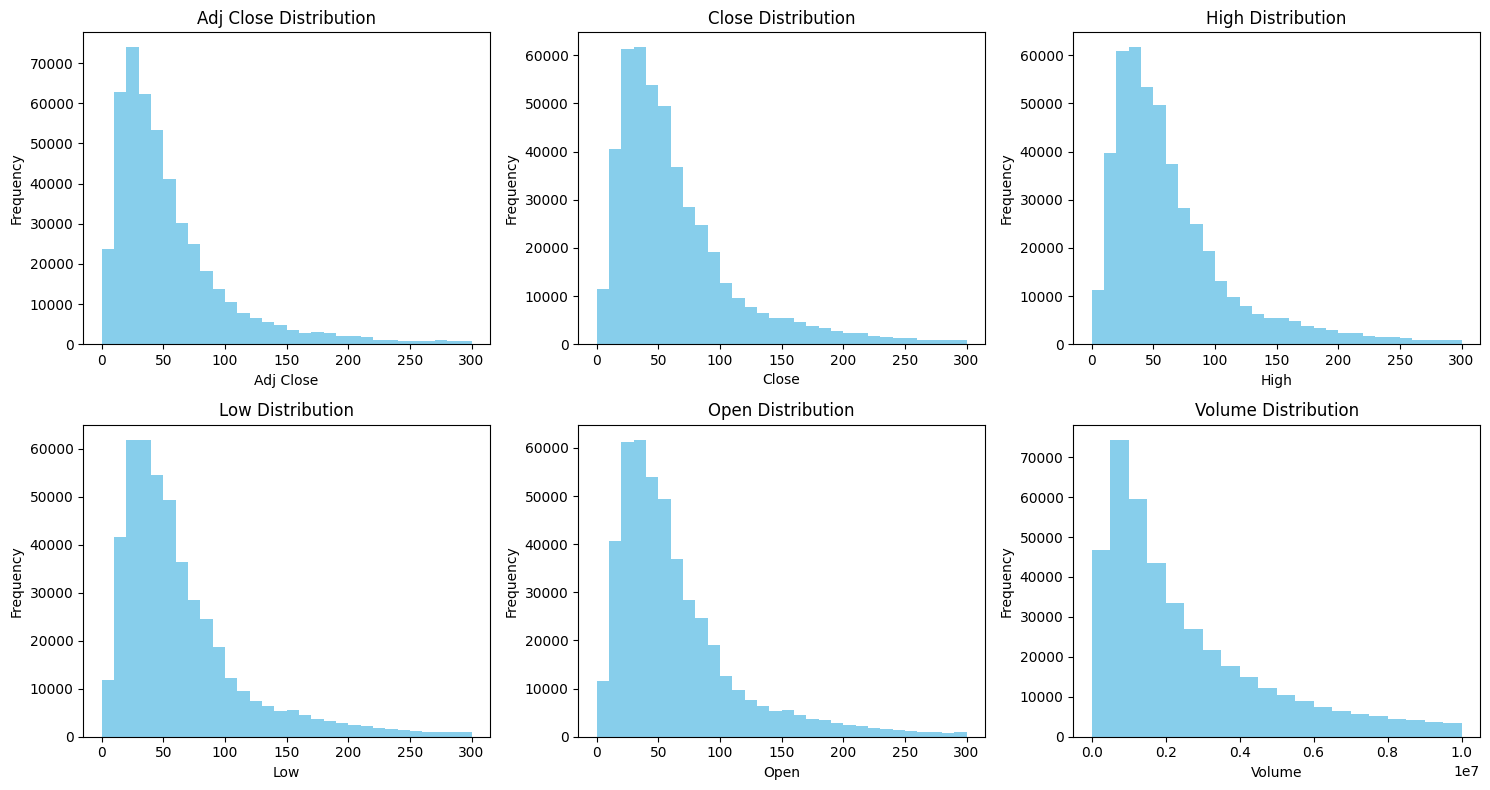

In [39]:
cols = ["Adj Close", "Close", "High", "Low", "Open", "Volume"]
limit = [300, 300, 300, 300, 300, 10000000]
bins = [30, 30, 30, 30, 30, 20]
ind = 1

plt.figure(figsize=(15, 8))

for col in cols:
    plt.subplot(2, 3, ind)
    plt.hist(df_train_filled[col], bins=bins[ind-1], color='skyblue', range=(0, limit[ind-1]))  # Limit range from 0 to 10
    plt.title(col + " Distribution")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    ind += 1

plt.tight_layout()
plt.show()
    

Most of the prices of all the stocks are between 20 and 40. Volume is most frequently between 500 000 and 1 000 000. All the graphs look as if the data is from the normal distribution (graph skewed to the right), but that cannot be confirmed without additional statistical tests. 

VISUALIZATIONS

In [40]:
def line_plot(df, stock, features):

    df1 = df[df["Symbol"] == stock]
    

    if len(df1) == 0:
        print("Data about this stock does not exist.")
        return
    
    df1.reset_index(drop=True, inplace=True)

    for feature in features:
        plt.plot(df1["Date"], df1[feature], label=feature)
    
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Plot with Dates on X-axis')
 
    dates_indexes = list(range(0, len(df1), len(df1)//10))
    if len(df1)-1 not in dates_indexes:
        dates_indexes.append(len(df1)-1)

    plt.xticks(df1.index[dates_indexes], df1['Date'][dates_indexes])
    plt.xticks(rotation=45)

    plt.legend()   
    plt.show()
    return

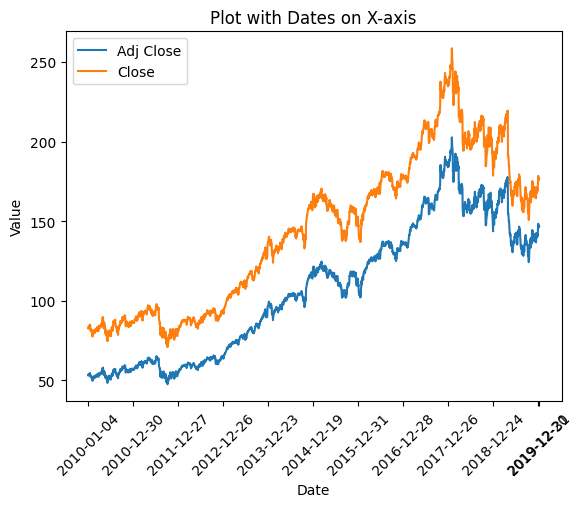

In [41]:
features = ["Adj Close", "Close"]
line_plot(df_train_validated, "MMM", features)

WHAT IS THE BEST STOCK TO BUY ON 15.4.2017.?

Choosing which stock is the best to buy based on previous data without any ML models or statistical test is very hard. It also depends on the investor's ideas of quality stocks- a safe investor doesn't want a stock which fluctuates while other investor might want those to maximise his profit.
I assume that goal of this question is to see which stock will have the biggest value in the future (by also looking at the future prices of it). For that I will look at the High feature.

In [42]:
print("STOCKS TRADED ON 15.4.2017. :")

for stock in stocks:
    df1 = df_train_validated[df_train_validated["Symbol"] == stock]
    
    if len(df1) > 0:
        date_index = df1[df1["Date"] == "2017-04-15"].index
        if len(date_index)>0:
            print(stock)



STOCKS TRADED ON 15.4.2017. :


As we can see, on 15.4.2017. there are no data about any stocks. The reason for that is it was Saturday and the markets were closed. We can then look at the next working day (the next possible day to buy stocks)- 17.4.2017., and look at the Open prices of stocks.

In [43]:
print("STOCKS TRADED ON 17.4.2017. :")

for stock in stocks:
    df1 = df_train_validated[df_train_validated["Symbol"] == stock]

    if len(df1) > 0:
        date_index = df1[df1["Date"] == "2017-04-17"].index
        if len(date_index)>0:
            print(stock)

STOCKS TRADED ON 17.4.2017. :
MMM
AOS
ACN
AES
A
AKAM
ALB
ALLE
LNT
GOOGL
MO
AMZN
AXP
AWK
AME
ANSS
APA
AAPL
AMAT
ADM
ANET
AIZ
T
BKR
BALL
BAC
BBY
BIIB
BLK
BMY
AVGO
BG
CPB
CAH
CBOE
CHRW
CHTR
CMG
CINF
CSCO
CFG
CME
CMS
KO
CAG
ED
STZ
CTRA
CMI
DVA
DE
XRAY
FANG
DLR
DFS
DPZ
DHI
DTE
DUK
EBAY
EMR
ENPH
EOG
EQIX
ESS
EL
EVRG
ES
EXPD
EXR
FFIV
FAST
FIS
FE
FLT
FTV
FCX
IT
GEN
GNRC
GM
GPC
GL
GS
HAS
PEAK
HSY
HES
HLT
HST
HBAN
IBM
ILMN
PODD
INTC
IFF
IP
ISRG
IVZ
INVH
IQV
JNJ
KDP
KEY
KEYS
KMB
KIM
KMI
KR
LVS
LDOS
LIN
LMT
LYB
MPC
MKTX
MMC
MCD
MAA
MHK
TAP
MPWR
MS
MOS
MSI
NDAQ
NEE
NDSN
NOC
NRG
NVDA
NVR
ORCL
PKG
PARA
PH
PAYX
PNR
PCG
PSX
PNW
PNC
PGR
PRU
PTC
PSA
PHM
PWR
QCOM
DGX
RL
RF
RSG
RMD
RVTY
RHI
ROL
ROST
SRE
SPG
SWKS
SO
STLD
SYF
TRGP
TGT
TEL
TDY
TXN
TMO
TJX
TSCO
TRMB
TFC
ULTA
UAL
VLO
VTR
VRSK
VZ
VRTX
V
WRB
WAB
WBA
WMT
DIS
WM
WAT
WEC
WFC
GWW
XEL
YUM
ZTS


In [44]:
#reset indexes because some rows with anomalies were removed
df_train_validated.reset_index(drop=True, inplace=True)

There were many stocks traded on that day so now let's analyse which ones had the best growth in the future. Since stocks are being bought on 17.4.2017. as soon as the markets open, I'll look at the Open feature for buying. 

In [45]:
stocks_buy = []
stocks_max_sell = []

for stock in stocks:
    df1 = df_train_validated[df_train_validated["Symbol"] == stock]

    if len(df1) == 0:
        stocks_buy.append(0)
        stocks_max_sell.append(0)
    
    else:
        if len(df1[df1["Date"] == "2017-04-17"].index) > 0:
            date_index = df1[df1["Date"] == "2017-04-17"].index[0]
            stocks_buy.append(df1.loc[date_index, "Open"])

            high_future = df1.loc[date_index:, "High"]
            stocks_max_sell.append(max(high_future))


max_profit = 0
best_stock = ""
stocks_profit = []
best_ind = -1

for i in range(len(stocks_buy)):
    stocks_profit.append(stocks_max_sell[i] - stocks_buy[i])

    if  stocks_profit[i] > max_profit:
        max_profit = stocks_profit[i]
        best_stock = stocks[i]
        best_ind = i

print("Of all the stocks in the dataset on the 17.4.2017., stock", best_stock, "gives the best future profit of", round(max_profit,2))

Of all the stocks in the dataset on the 17.4.2017., stock NRG gives the best future profit of 1828.56


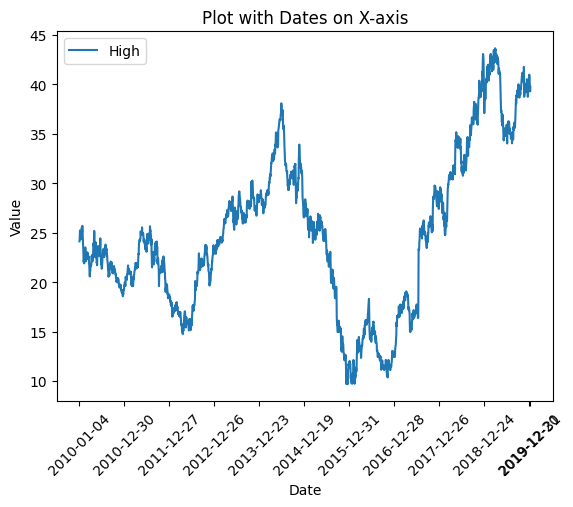

In [46]:
line_plot(df_train_validated, "NRG", ["High"])

BASELINE MODEL

In this chapter I will create a simple classification model and test it on the test dataset.

In [47]:
df_train_validated["Target"] = df_train_validated["Target"].astype(int)

X_train = df_train_validated[["Adj Close", "Close", "High", "Low", "Open", "Volume"]]
y_train = df_train_validated["Target"]


X_test = df_test_filled[["Adj Close", "Close", "High", "Low", "Open", "Volume"]]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [48]:
predictions = model.predict(X_test_scaled)

SUBMISSION

In [49]:
submission = df_test.loc[:,df_test.columns.isin(('Id', ))]

for i in range(len(submission)):
    submission.loc[i,'Target'] = predictions[i]

# Save predictions to working directiory - this creates submission file
submission.to_csv("submission.csv", index=None)

submission.head()

/tmp/ipykernel_33/408897602.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission.loc[i,'Target'] = predictions[i]


,Id,Target
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0


In [52]:
df_train_validated.to_csv("train_lab1.csv", index=False)

In [55]:
df_test_filled.to_csv("test_lab1.csv", index=False)